# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Carregar a base de dados
previsao_renda = pd.read_csv('previsao_de_renda.csv')

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

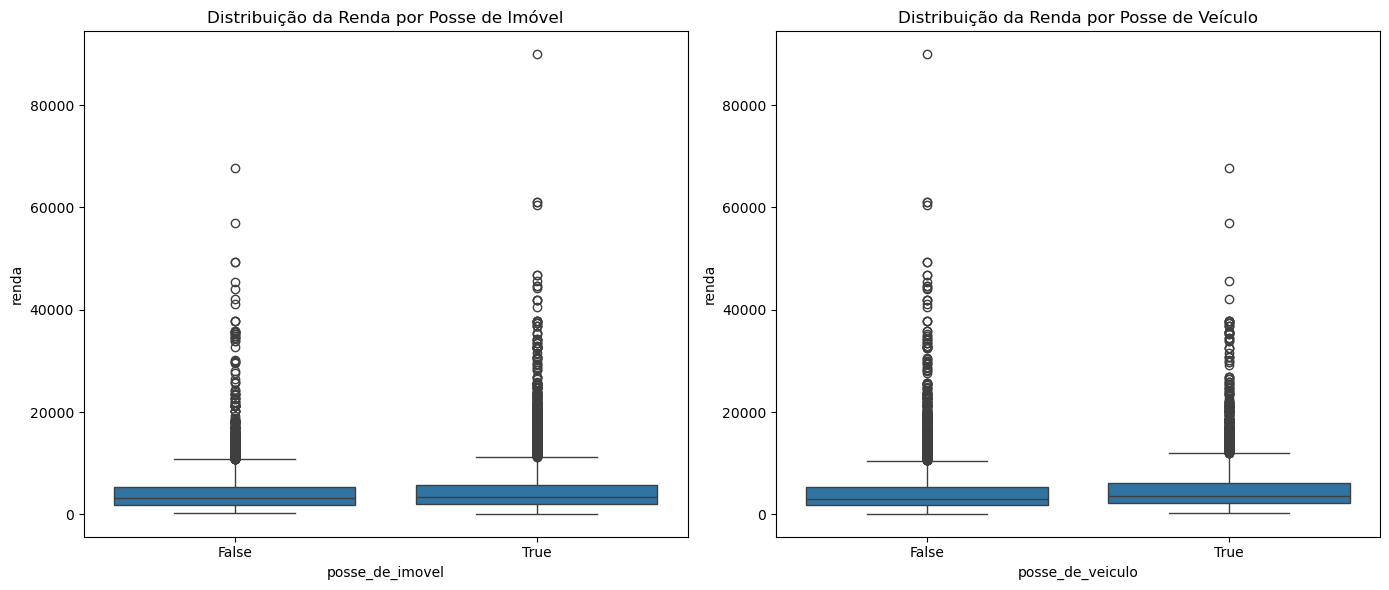

In [3]:
# Criar boxplots para visualizar a distribuição da renda em relação às variáveis qualitativas
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='posse_de_imovel', y='renda', data=previsao_renda)
plt.title('Distribuição da Renda por Posse de Imóvel')

plt.subplot(1, 2, 2)
sns.boxplot(x='posse_de_veiculo', y='renda', data=previsao_renda)
plt.title('Distribuição da Renda por Posse de Veículo')

plt.tight_layout()
plt.show()

A distribuição da renda parece mostrar uma ligeira diferença entre aqueles que possuem imóvel e aqueles que não possuem. Também é mostrada uma diferença mais pronunciada entre aqueles que possuem veículo e aqueles que não possuem

In [7]:
# Separar os dados com base nas categorias de posse de imóvel e posse de veículo
renda_posse_imovel = previsao_renda[previsao_renda['posse_de_imovel'] == 1]['renda']
renda_sem_imovel = previsao_renda[previsao_renda['posse_de_imovel'] == 0]['renda']

renda_posse_veiculo = previsao_renda[previsao_renda['posse_de_veiculo'] == 1]['renda']
renda_sem_veiculo = previsao_renda[previsao_renda['posse_de_veiculo'] == 0]['renda']

# Realizar o teste t de Student
t_stat_imovel, p_value_imovel = ttest_ind(renda_posse_imovel, renda_sem_imovel, equal_var=False)
t_stat_veiculo, p_value_veiculo = ttest_ind(renda_posse_veiculo, renda_sem_veiculo, equal_var=False)

# Resultados
print(f'Teste t para posse de imóvel: t = {t_stat_imovel}, p = {p_value_imovel}')
print(f'Teste t para posse de veículo: t = {t_stat_veiculo}, p = {p_value_veiculo}')

Teste t para posse de imóvel: t = 3.677635545954218, p = 0.00023665092205816239
Teste t para posse de veículo: t = 7.712332220715903, p = 1.3324346963629966e-14


O valor de p é muito menor que 0.05, indicando que há uma diferença estatisticamente significativa na renda entre aqueles que possuem imóvel e aqueles que não possuem. Posteriormente, também podemos analisar que o valor de p é extremamente menor que 0.05, indicando uma diferença altamente significativa na renda entre aqueles que possuem veículo e aqueles que não possuem.

Ambas as variáveis qualitativas, posse de imóvel e posse de veículo, são boas preditoras de renda. No entanto, a posse de veículo parece ter uma relação mais forte com a renda, dado o valor de p muito menor no teste t. Essas análises sugerem que as pessoas que possuem imóveis e veículos tendem a ter rendas significativamente diferentes das que não possuem